<a href="https://colab.research.google.com/github/santz1994/UTS_ML2/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

## Latar Belakang

Kartu kredit merupakan salah satu produk keuangan yang banyak digunakan oleh masyarakat. Untuk meminimalisir risiko gagal bayar, industri keuangan menggunakan credit score card sebagai metode pengendalian risiko. Credit score card memanfaatkan data dan informasi pribadi yang diajukan oleh calon pemegang kartu kredit untuk memprediksi kemungkinan terjadinya gagal bayar di masa depan. Dengan demikian, bank dapat mengambil keputusan apakah akan menerbitkan kartu kredit kepada pemohon atau tidak. Skor kredit ini mampu mengkuantifikasi tingkat risiko secara objektif.

## Tujuan Bisnis

Tujuan dari proyek ini adalah membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client. Berbeda dengan tugas-tugas lain, definisi 'good' atau 'bad' client tidak diberikan secara eksplisit, sehingga perlu dilakukan konstruksi label menggunakan teknik tertentu seperti vintage analysis. Selain itu, masalah data yang tidak seimbang (unbalanced data) juga menjadi tantangan utama dalam tugas ini.

## Dampak Bisnis
Dengan adanya model prediksi yang akurat dan transparan, bank dapat:
- Mengurangi risiko gagal bayar.
- Mengoptimalkan proses pemberian kredit.
- Memberikan alasan yang jelas kepada nasabah dan regulator terkait keputusan kredit.
- Meningkatkan kepercayaan dan kepuasan nasabah.


## Project Domain

Proyek ini berada dalam domain keuangan, khususnya pada pengelolaan risiko kredit. Fokusnya adalah pada pengembangan model prediksi untuk credit scoring, yang digunakan oleh lembaga keuangan untuk menilai kelayakan kredit calon nasabah. Dengan memanfaatkan data historis dan algoritma machine learning, proyek ini bertujuan untuk meningkatkan akurasi prediksi risiko gagal bayar, sekaligus memastikan transparansi dalam pengambilan keputusan kredit.

## Problem Statements

Umumnya, credit score card dibangun berdasarkan data historis. Namun, ketika terjadi fluktuasi ekonomi yang besar, model yang dibangun dari data masa lalu bisa kehilangan kemampuan prediksinya. Model logistik (logistic regression) sering digunakan untuk credit scoring karena cocok untuk tugas klasifikasi biner dan dapat menghitung koefisien dari setiap fitur. Namun, seiring perkembangan teknologi, algoritma machine learning seperti Boosting, Random Forest, dan Support Vector Machines mulai digunakan untuk meningkatkan akurasi prediksi. Meskipun demikian, metode-metode ini sering kali kurang transparan dan sulit memberikan alasan penolakan atau penerimaan kepada nasabah maupun regulator.

## Goals

1. Membangun model machine learning yang dapat memprediksi apakah seorang pemohon kartu kredit termasuk kategori 'good' atau 'bad' client.
2. Mengatasi tantangan data yang tidak seimbang (unbalanced data) untuk memastikan model memiliki performa yang baik pada kedua kategori.
3. Memastikan model yang dibangun memiliki tingkat akurasi yang tinggi sekaligus transparan dalam pengambilan keputusan.
4. Memberikan insight yang dapat digunakan oleh bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

## Solution Statements

1. Mengumpulkan dan memahami data historis yang relevan untuk membangun model prediksi credit scoring.
2. Melakukan eksplorasi data untuk mengidentifikasi pola, outlier, dan distribusi data, serta menangani data yang tidak seimbang (unbalanced data).
3. Menggunakan algoritma machine learning seperti Logistic Regression, Random Forest, dan Boosting untuk membangun model prediksi.
4. Melakukan evaluasi model menggunakan metrik yang sesuai seperti akurasi, precision, recall, dan F1-score untuk memastikan performa model.
5. Memastikan transparansi model dengan menggunakan teknik interpretasi model seperti SHAP (SHapley Additive exPlanations) atau LIME (Local Interpretable Model-agnostic Explanations).
6. Memberikan rekomendasi berbasis data kepada bank untuk mengurangi risiko gagal bayar dan meningkatkan efisiensi proses pemberian kredit.

# Data Understanding

Pada tahap ini, kita akan memahami struktur data yang akan digunakan untuk membangun model prediksi. Langkah-langkah yang akan dilakukan meliputi:
1. Melihat sekilas data (head, info, dan deskripsi statistik).
2. Memeriksa distribusi data dan nilai yang hilang.
3. Mengidentifikasi fitur-fitur yang relevan untuk analisis lebih lanjut.

## Import data dari kaggle

In [28]:
from google.colab import files
files.upload()

{}

In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [30]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction --force

Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
  0% 0.00/5.32M [00:00<?, ?B/s]
100% 5.32M/5.32M [00:00<00:00, 263MB/s]


In [31]:
!mkdir credit-card-approval-prediction
!unzip credit-card-approval-prediction.zip -d credit-card-approval-prediction
!ls credit-card-approval-prediction

mkdir: cannot create directory ‘credit-card-approval-prediction’: File exists
Archive:  credit-card-approval-prediction.zip
replace credit-card-approval-prediction/application_record.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
application_record.csv	credit_record.csv


## Import Library yang dibutuhkan

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib

## Exploratory Data Analysis

In [33]:
# Load datasets
app_df = pd.read_csv('credit-card-approval-prediction/application_record.csv')
credit_df = pd.read_csv('credit-card-approval-prediction/credit_record.csv')

In [34]:
# Merge datasets on 'ID'
data = pd.merge(app_df, credit_df, on='ID', how='inner')

In [35]:
# Exploratory Data Analysis (EDA)
print("Dataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nDataset Shape:", data.shape)

print("\nDescriptive Statistics:")
print(data.describe(include='all'))

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 


Distribution of Credit Status (STATUS):


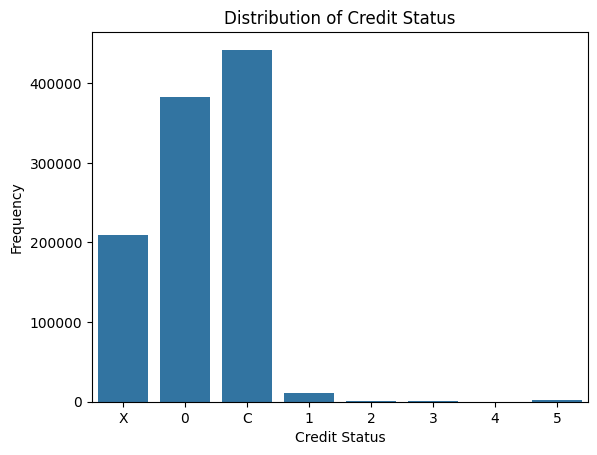

In [36]:
# Distribution of target variable (STATUS)
print("\nDistribution of Credit Status (STATUS):")
sns.countplot(x='STATUS', data=credit_df)
plt.title('Distribution of Credit Status')
plt.xlabel('Credit Status')
plt.ylabel('Frequency')
plt.show()

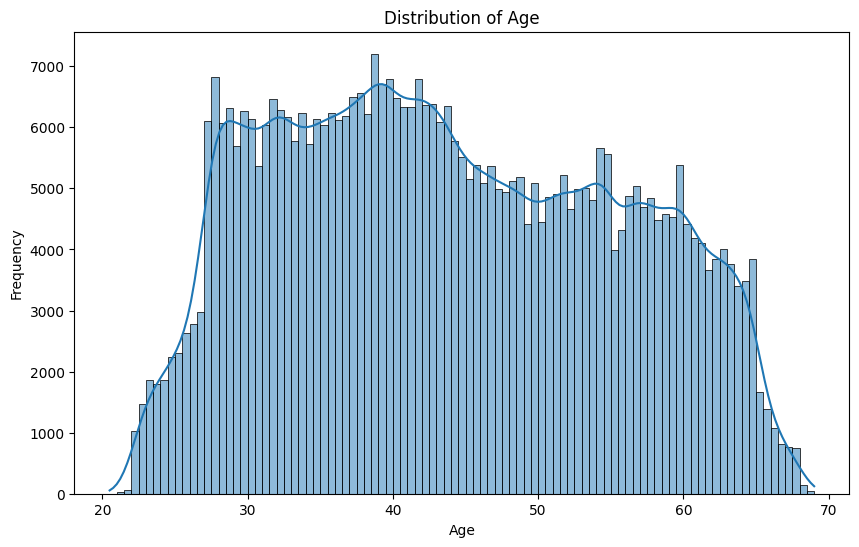

In [37]:
# Distribution of Age
plt.figure(figsize=(10, 6))
# Check if 'DAYS_BIRTH' is in the DataFrame and convert to age
if 'DAYS_BIRTH' in app_df.columns: # Changed data to app_df
    app_df['age'] = -app_df['DAYS_BIRTH'] / 365.25  # Convert days to years # Changed data to app_df
    sns.histplot(app_df['age'], kde=True) # Changed data to app_df
    plt.title('Distribution of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'DAYS_BIRTH' not found for age calculation.")

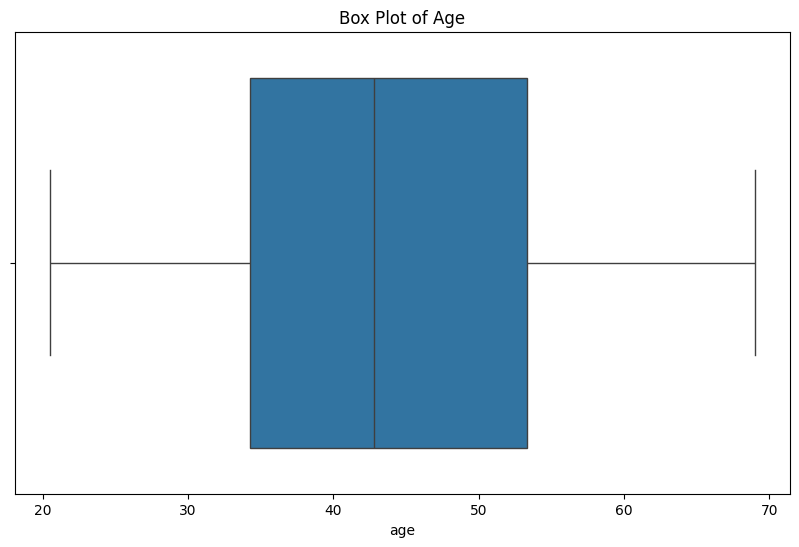

In [38]:
# Boxplot of Age
plt.figure(figsize=(10, 6))
# Check if 'age' is in app_df before creating the boxplot
if 'age' in app_df.columns:
    sns.boxplot(x=app_df['age']) # Changed data to app_df
    plt.title('Box Plot of Age')
    plt.show()
else:
    print("Column 'age' not found for box plot.")


Analysis of AMT_INCOME_TOTAL:
count    4.385570e+05
mean     1.875243e+05
std      1.100869e+05
min      2.610000e+04
25%      1.215000e+05
50%      1.607805e+05
75%      2.250000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


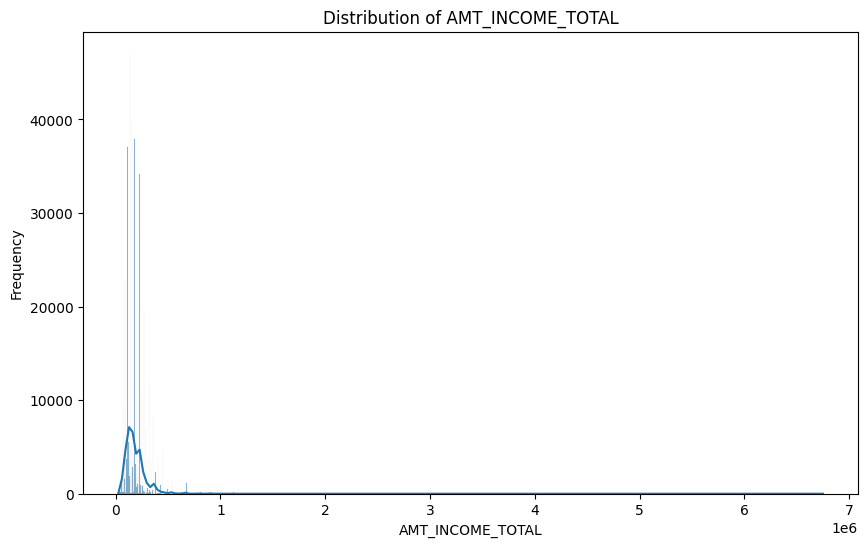

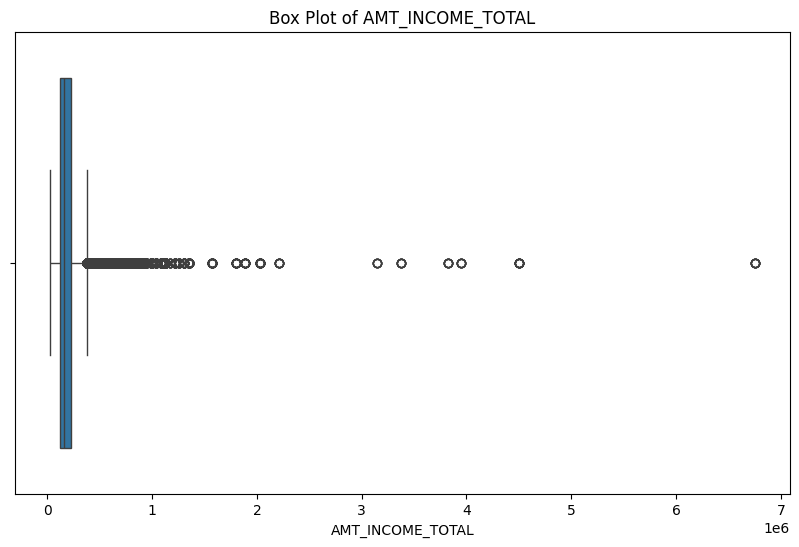

In [39]:
# Analysis of AMT_INCOME_TOTAL
print("\nAnalysis of AMT_INCOME_TOTAL:")
print(app_df['AMT_INCOME_TOTAL'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(app_df['AMT_INCOME_TOTAL'], kde=True)
plt.title('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=app_df['AMT_INCOME_TOTAL'])
plt.title('Box Plot of AMT_INCOME_TOTAL')
plt.show()


Analysis of NAME_INCOME_TYPE:
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


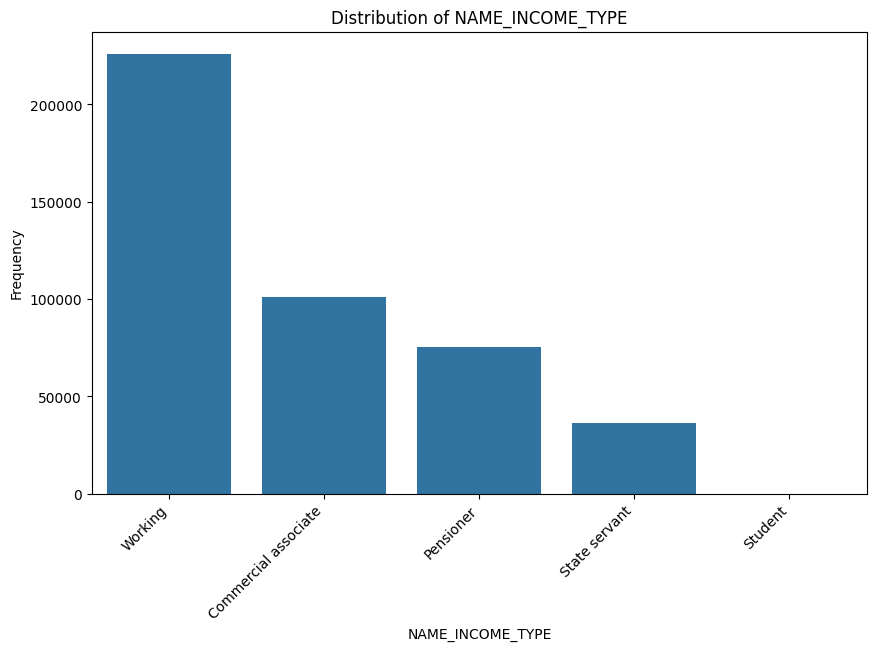

In [40]:
# Analysis of NAME_INCOME_TYPE
print("\nAnalysis of NAME_INCOME_TYPE:")
print(app_df['NAME_INCOME_TYPE'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_INCOME_TYPE', data=app_df)
plt.title('Distribution of NAME_INCOME_TYPE')
plt.xlabel('NAME_INCOME_TYPE')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Analysis of MONTHS_BALANCE:
Min Months Balance: -60
Max Months Balance: 0


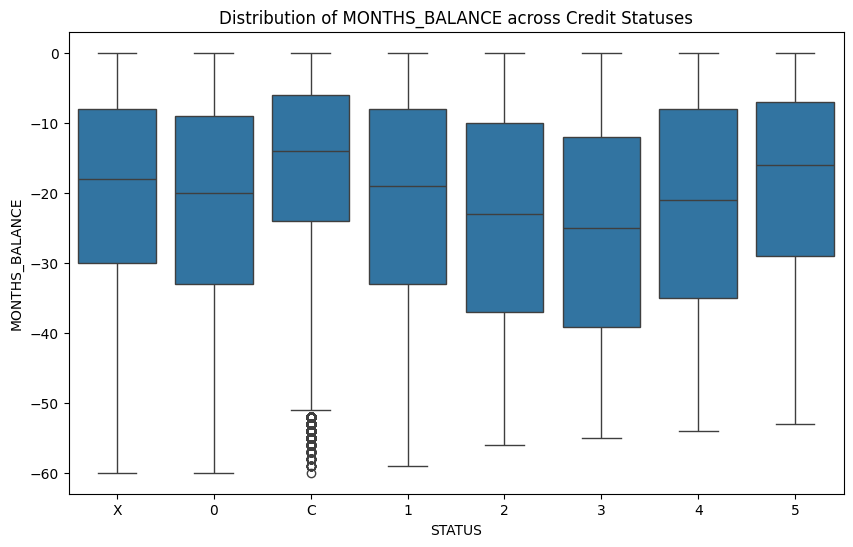

In [41]:
# Analysis of MONTHS_BALANCE
print("\nAnalysis of MONTHS_BALANCE:")
print("Min Months Balance:", credit_df['MONTHS_BALANCE'].min())
print("Max Months Balance:", credit_df['MONTHS_BALANCE'].max())

plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='MONTHS_BALANCE', data=credit_df)
plt.title('Distribution of MONTHS_BALANCE across Credit Statuses')
plt.show()

# Data Preparation

In [42]:
# Merge datasets on 'ID'
data = pd.merge(app_df, credit_df, on='ID', how='inner') # Remerge with updated app_df

In [43]:
# Create target variable
data['target'] = data['STATUS'].apply(lambda x: 1 if x in ['1', '2', '3', '4', '5'] else 0)

In [44]:
# Split data into training and testing sets before feature engineering and preprocessing
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
# Handle missing values
X_train = X_train.dropna() # Handle missing values in training set
X_test = X_test.dropna() # Handle missing values in testing set
y_train = y_train[X_train.index] # Align y_train with X_train after dropping rows
y_test = y_test[X_test.index] # Align y_test with X_test after dropping rows

In [46]:
# Feature engineering: Calculate credit history length
X_train['credit_history_length'] = abs(X_train['MONTHS_BALANCE']) # Apply to training set
X_test['credit_history_length'] = abs(X_test['MONTHS_BALANCE']) # Apply to testing set

<ipython-input-46-55e878a2399b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['credit_history_length'] = abs(X_test['MONTHS_BALANCE']) # Apply to testing set


In [47]:
# Drop unnecessary columns
X_train = X_train.drop(['ID', 'DAYS_BIRTH', 'MONTHS_BALANCE', 'STATUS'], axis=1) # Apply to training set
X_test = X_test.drop(['ID', 'DAYS_BIRTH', 'MONTHS_BALANCE', 'STATUS'], axis=1) # Apply to testing set

In [48]:
# Encode categorical variables
categorical_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                    'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER',
                    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col]) # Fit on training set
    X_test[col] = le.transform(X_test[col]) # Transform testing set using the same encoder
    label_encoders[col] = le

In [49]:
# Normalize features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training set
X_test_scaled = scaler.transform(X_test) # Transform testing set using the same scaler

# Modeling

In [50]:
# Build the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

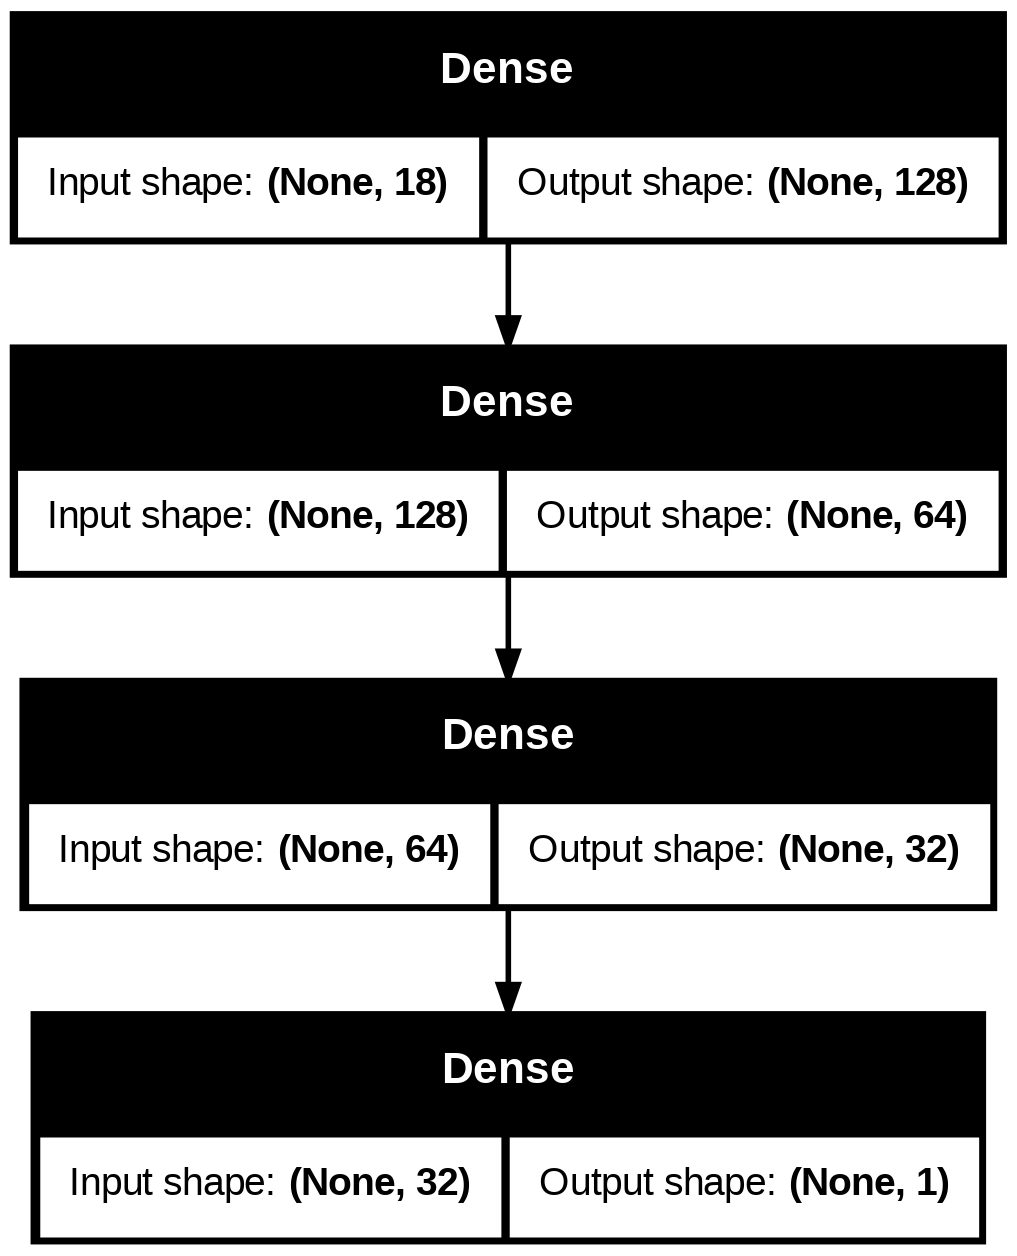

In [53]:
# Plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [54]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)

Epoch 1/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9840 - loss: 0.0859 - val_accuracy: 0.9842 - val_loss: 0.0815
Epoch 2/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9845 - loss: 0.0788 - val_accuracy: 0.9842 - val_loss: 0.0797
Epoch 3/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.9841 - loss: 0.0788 - val_accuracy: 0.9842 - val_loss: 0.0780
Epoch 4/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9844 - loss: 0.0765 - val_accuracy: 0.9841 - val_loss: 0.0767
Epoch 5/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9844 - loss: 0.0760 - val_accuracy: 0.9843 - val_loss: 0.0756
Epoch 6/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.9847 - loss: 0.0737 - val_accuracy: 0.9842 - val_loss: 0.0749
Epoch 7/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9844 - loss: 0.0738 - val_accuracy: 0.9844 - val_loss: 0.0741
Epoch 8/50
13442/13442 ━━━━━━━━━━━━━━━━━━━━ 78s 3ms/step - accuracy: 

# Evaluation

In [55]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Loss Model: {loss:.4f}")

3361/3361 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9844 - loss: 0.0704
Test Accuracy: 0.9845
Loss Model: 0.0697


Text(0.5, 1.0, 'Model Accuracy')

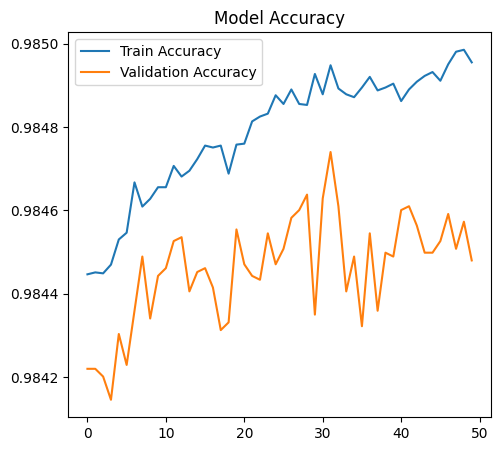

In [56]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

3361/3361 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


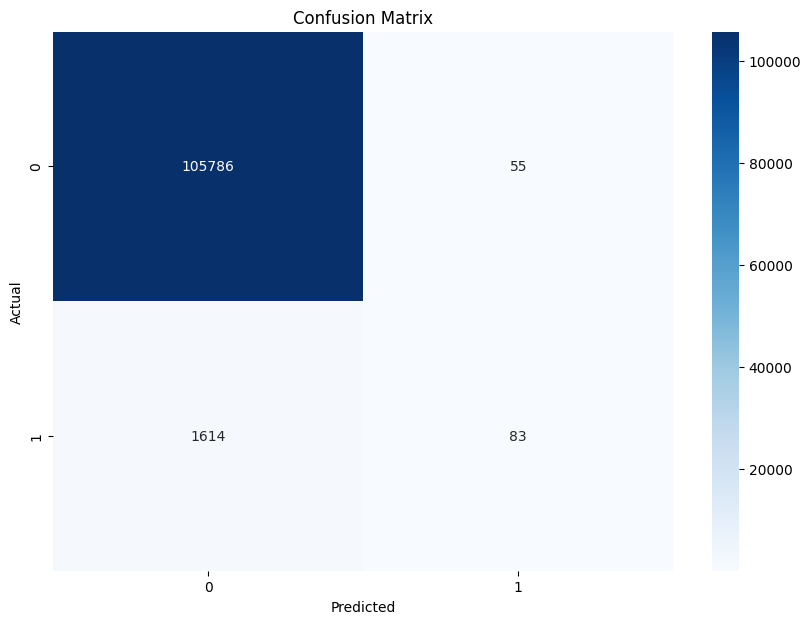

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    105841
           1       0.60      0.05      0.09      1697

    accuracy                           0.98    107538
   macro avg       0.79      0.52      0.54    107538
weighted avg       0.98      0.98      0.98    107538



In [57]:
# Confusion matrix and classification report
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Deployment

## Model Simulation

In [58]:
sample_input_dict_1 = {
    'AMT_INCOME_TOTAL': 50000,
    'age': 35,
    'NAME_INCOME_TYPE': label_encoders['NAME_INCOME_TYPE'].transform(['Working'])[0],
    'NAME_EDUCATION_TYPE': label_encoders['NAME_EDUCATION_TYPE'].transform(['Higher education'])[0],
    'NAME_FAMILY_STATUS': label_encoders['NAME_FAMILY_STATUS'].transform(['Married'])[0],
    'NAME_HOUSING_TYPE': label_encoders['NAME_HOUSING_TYPE'].transform(['House / apartment'])[0],
    'OCCUPATION_TYPE': label_encoders['OCCUPATION_TYPE'].transform(['Laborers'])[0],
    'CODE_GENDER': label_encoders['CODE_GENDER'].transform(['M'])[0],
    'FLAG_OWN_CAR': label_encoders['FLAG_OWN_CAR'].transform(['Y'])[0],
    'FLAG_OWN_REALTY': label_encoders['FLAG_OWN_REALTY'].transform(['Y'])[0],
    'CNT_CHILDREN': 0,
    'AMT_CREDIT': 100000,
    'AMT_ANNUITY': 5000,
    'AMT_GOODS_PRICE': 100000,
    'REGION_POPULATION_RELATIVE': 0.01,
    'DAYS_EMPLOYED': -1000,
    'credit_history_length': 12
}

sample_input_df_1 = pd.DataFrame([sample_input_dict_1])

In [59]:
sample_input_dict_2 = {
    'AMT_INCOME_TOTAL': 30000,
    'age': 22,
    'NAME_INCOME_TYPE': label_encoders['NAME_INCOME_TYPE'].transform(['Working'])[0],
    'NAME_EDUCATION_TYPE': label_encoders['NAME_EDUCATION_TYPE'].transform(['Secondary / secondary special'])[0],
    'NAME_FAMILY_STATUS': label_encoders['NAME_FAMILY_STATUS'].transform(['Single / not married'])[0],
    'NAME_HOUSING_TYPE': label_encoders['NAME_HOUSING_TYPE'].transform(['Rented apartment'])[0],
    'OCCUPATION_TYPE': label_encoders['OCCUPATION_TYPE'].transform(['Laborers'])[0],
    'CODE_GENDER': label_encoders['CODE_GENDER'].transform(['M'])[0],
    'FLAG_OWN_CAR': label_encoders['FLAG_OWN_CAR'].transform(['N'])[0],
    'FLAG_OWN_REALTY': label_encoders['FLAG_OWN_REALTY'].transform(['N'])[0],
    'CNT_CHILDREN': 0,
    'AMT_CREDIT': 50000,
    'AMT_ANNUITY': 3000,
    'AMT_GOODS_PRICE': 50000,
    'REGION_POPULATION_RELATIVE': 0.005,
    'DAYS_EMPLOYED': -500,
    'credit_history_length': 6
}

sample_input_df_2 = pd.DataFrame([sample_input_dict_2])

In [60]:
# Preprocess and predict for Sample 1
# Ensure sample_input_df_1 has all columns present in X_train, filled with 0 for missing ones
for col in X_train.columns:
    if col not in sample_input_df_1.columns:
        sample_input_df_1[col] = 0  # Fill missing columns with 0

sample_input_df_1 = sample_input_df_1[X_train.columns]  # Reorder columns to match X_train
sample_input_scaled_1 = scaler.transform(sample_input_df_1)
predicted_class_1 = (model.predict(sample_input_scaled_1) > 0.5).astype("int32")[0][0]

# Preprocess and predict for Sample 2
# Ensure sample_input_df_2 has all columns present in X_train, filled with 0 for missing ones
for col in X_train.columns:
    if col not in sample_input_df_2.columns:
        sample_input_df_2[col] = 0  # Fill missing columns with 0

sample_input_df_2 = sample_input_df_2[X_train.columns]  # Reorder columns to match X_train
sample_input_scaled_2 = scaler.transform(sample_input_df_2)
predicted_class_2 = (model.predict(sample_input_scaled_2) > 0.5).astype("int32")[0][0]

# Interpret the predictions - Sample 1
print("Sample 1:")
if predicted_class_1 == 1:
    print("The model predicts this applicant is a 'bad' client (high risk).")
else:
    print("The model predicts this applicant is a 'good' client (low risk).")

# Interpret the predictions - Sample 2
print("\nSample 2:")
if predicted_class_2 == 1:
    print("The model predicts this applicant is a 'bad' client (high risk).")
else:
    print("The model predicts this applicant is a 'good' client (low risk).")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sample 1:
The model predicts this applicant is a 'good' client (low risk).

Sample 2:
The model predicts this applicant is a 'good' client (low risk).


## Save Model

In [61]:
# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('credit_risk_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Save the preprocessing objects (scaler and label_encoders)
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

print("TensorFlow Lite model and preprocessing objects saved successfully!")

Saved artifact at '/tmp/tmplyorvzul'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 18), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  137781383454288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383454096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383455056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383452944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383453136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383453904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383451792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137781383456400: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model and preprocessing objects saved successfully!
